## Non Linear Classification using SVM Kernel trick

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_circles, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import svm

(500, 2) (500,)


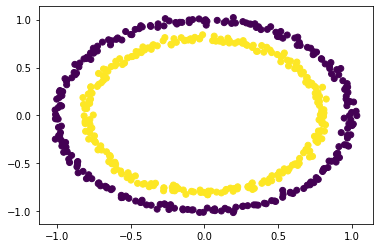

In [2]:
# Generate circles dataset
X, y = make_circles(n_samples=500, noise=0.02)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
def plot3d(X, y, show=True):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=y, depthshade=True)
    if(show==True):
        plt.show()
    return ax

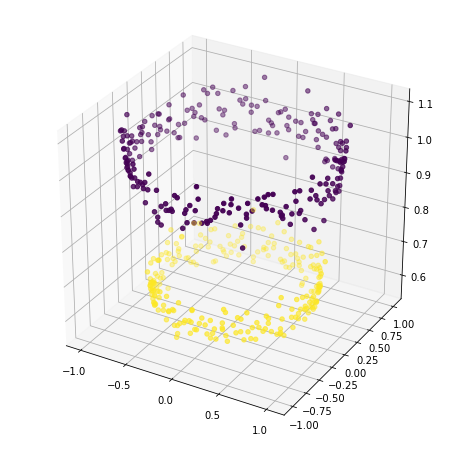

In [4]:
X_ = np.zeros((X.shape[0], 3))
X_[:, :-1] = X
X_[:, -1] = X[:, 0]**2 + X[:, 1]**2

ax = plot3d(X_, y)

## Logistic Classifier on Higher Dimension Space

In [5]:
lr = LogisticRegression()
lr.fit(X_, y)
acc = lr.score(X_, y)

print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 100.0000


[[ -0.03962013  -0.01136772 -10.91930376]] [8.93473609]


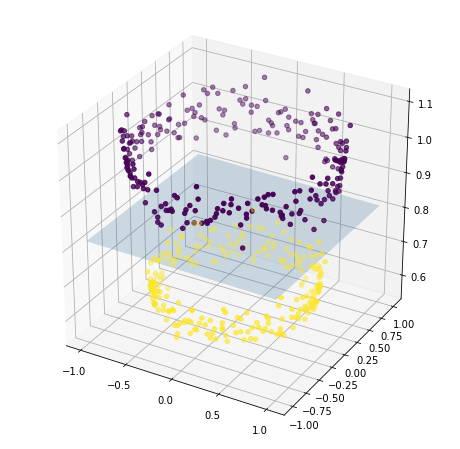

In [6]:
# Visualise the decision surface

wts = lr.coef_
bias = lr.intercept_
print(wts, bias)

xx, yy = np.meshgrid(range(-1,2), range(-1,2))
z = -(wts[0,0]*xx + wts[0,1]*yy + bias) / wts[0,2]

ax = plot3d(X_, y, False)
ax.plot_surface(xx, yy, z, alpha=0.2)
plt.show()

## Kernel based classification

In [7]:
# Custom kernel
def custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T))

# Testing and scoring
clf = svm.SVC(kernel=custom_kernel)
clf.fit(X, y)

clf.score(X, y)

1.0

In [8]:
# Linear Kernel SVM
svc1 = svm.SVC(kernel="linear")
svc1.fit(X, y)
sc = svc1.score(X, y)
print('linear', sc)

# Polynomial Kernel SVM
svc2 = svm.SVC(kernel="poly")
svc2.fit(X, y)
sc = svc2.score(X, y)
print('polynomial', sc)

# RBF Kernel SVM
svc3 = svm.SVC(kernel="rbf")
svc3.fit(X, y)
sc = svc3.score(X, y)
print('rbf', sc)

linear 0.5
polynomial 0.55
rbf 1.0


(400, 2) (400,)


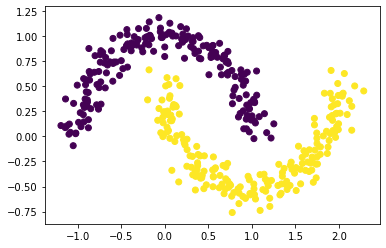

In [9]:
# Generate moons dataset
X2, y2 = make_moons(n_samples=400, noise=0.1)
print(X2.shape, y2.shape)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

In [10]:
# Testing and scoring
svc4 = svm.SVC(kernel='rbf')
svc4.fit(X2, y2)

print(svc4.score(X2, y2))

0.9975
